In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data_path = "2020.csv"
data = pd.read_csv(data_path)
data.head(10)
# data.columns

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
6,Sweden,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
7,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
8,Austria,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
9,Luxembourg,Western Europe,7.2375,0.030852,7.297970,7.177031,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [6]:
data.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

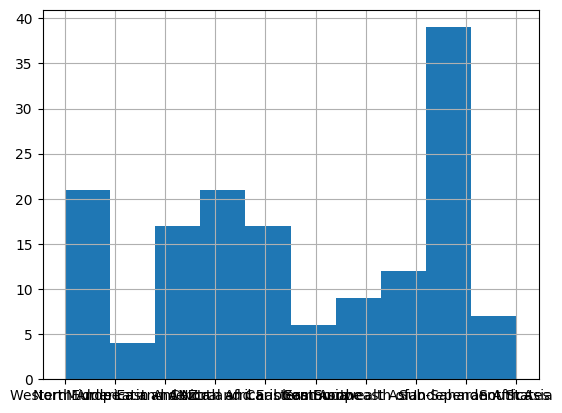

In [8]:
data['Regional indicator'].hist();

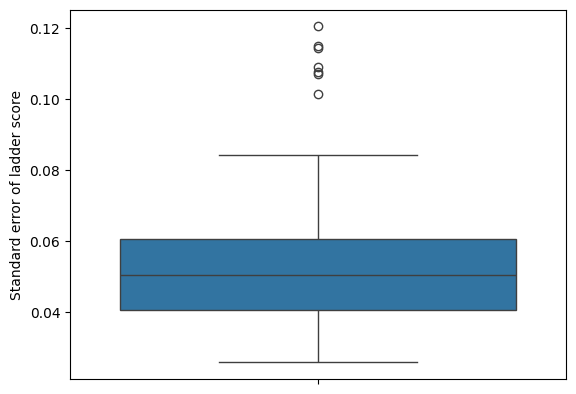

In [9]:
sns.boxplot(data['Standard error of ladder score']);

<ipython-input-23-88c21ff48b19>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Country name',


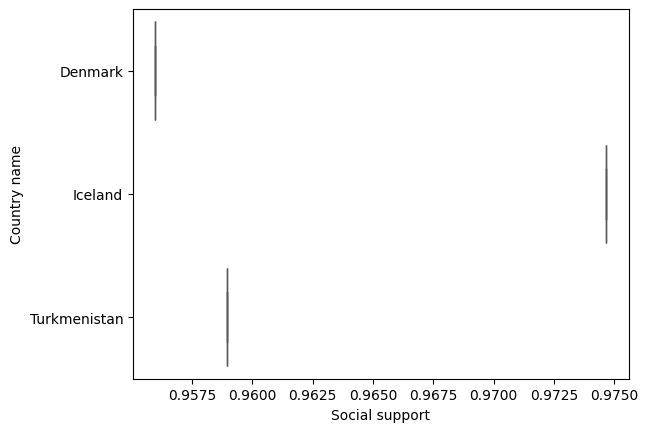

In [23]:
top_data = data[['Country name','Social support']]
top_data = top_data.groupby('Country name').sum()
top_data = top_data.sort_values('Social support',ascending=False)
top_data = top_data[:3].index.values
sns.boxplot(y='Country name',
            x='Social support',
            data=data[data['Country name'].isin(top_data)], palette='Set2');

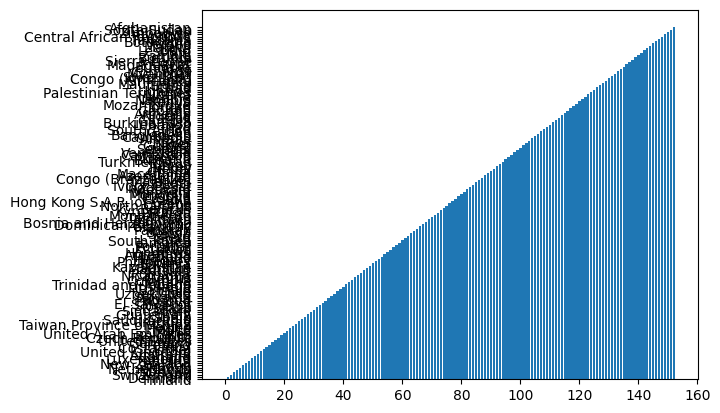

In [24]:
plt.bar(data.index, data['Country name'])
plt.show()

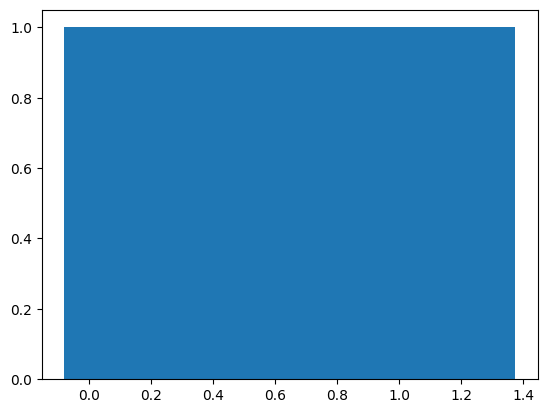

In [25]:
hist = data['Social support'].value_counts()
plt.bar(hist.index, hist);

In [60]:
feats=[f for f in data.columns if 'co' in f]
feats

['Ladder score',
 'Standard error of ladder score',
 'Perceptions of corruption',
 'Ladder score in Dystopia',
 'Explained by: Perceptions of corruption']

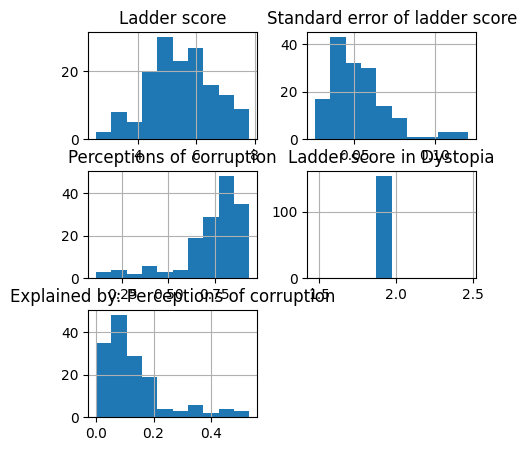

In [61]:
data[feats].hist(figsize=(5,5));

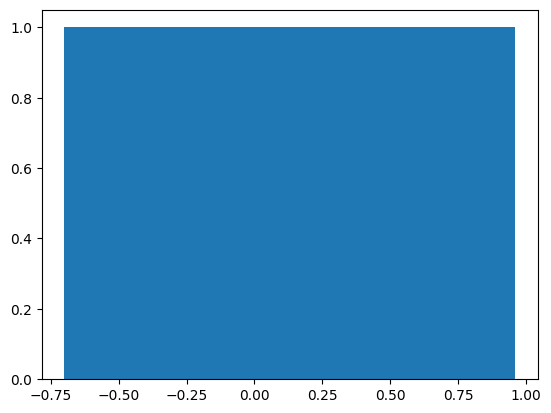

In [62]:
hist = data['Generosity'].value_counts()
plt.bar(hist.index, hist);

In [63]:
data['Generosity'].value_counts()

,count
Generosity,
-0.059482,1
0.066202,1
0.105911,1
0.246944,1
0.134533,1
...,...
0.082410,1
0.055484,1
-0.072064,1


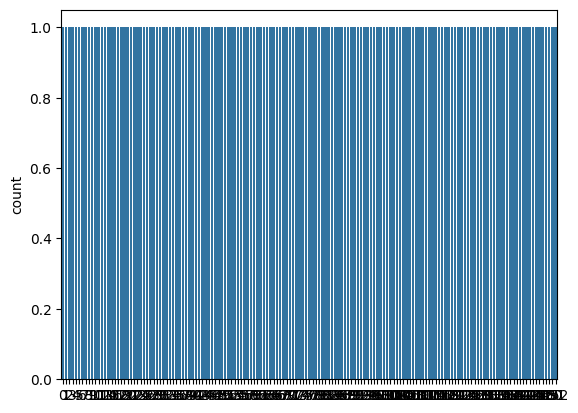

In [64]:
sns.countplot(data['Generosity']);

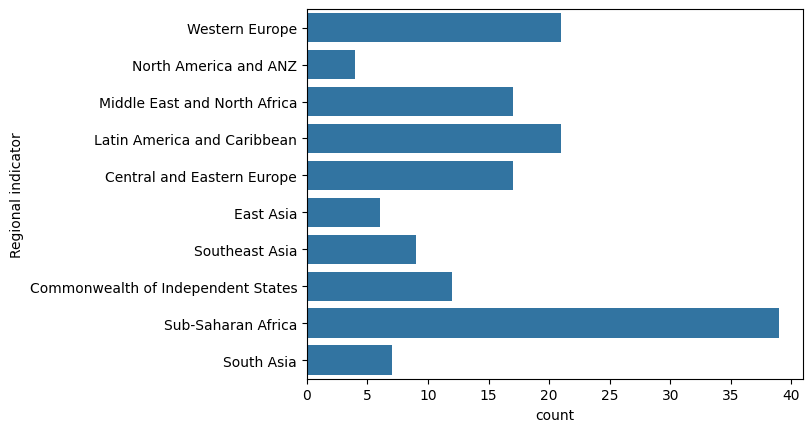

In [65]:
sns.countplot(data['Regional indicator']);

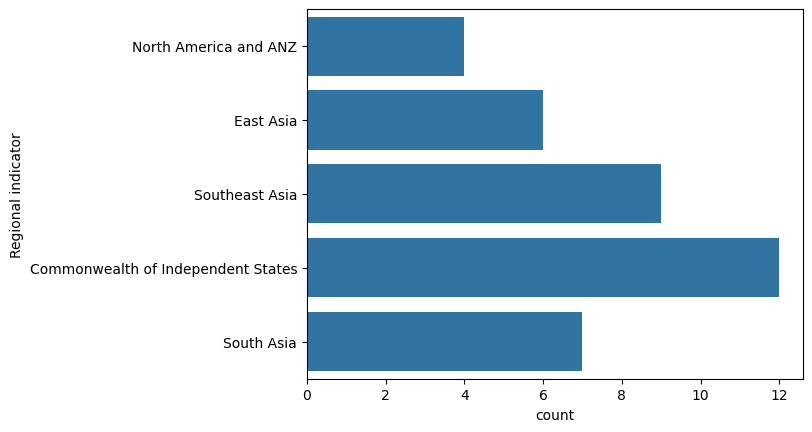

In [66]:
sns.countplot(data[data['Regional indicator'].isin(data['Regional indicator'].value_counts().tail(5).index)]['Regional indicator']);

In [67]:
data.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [68]:
feats = [f for f in data.columns if 'co' in f]
len(feats)

5

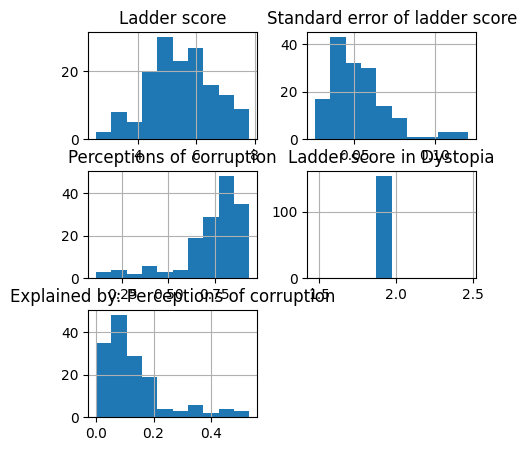

In [69]:
data[feats].hist(figsize=(5,5));

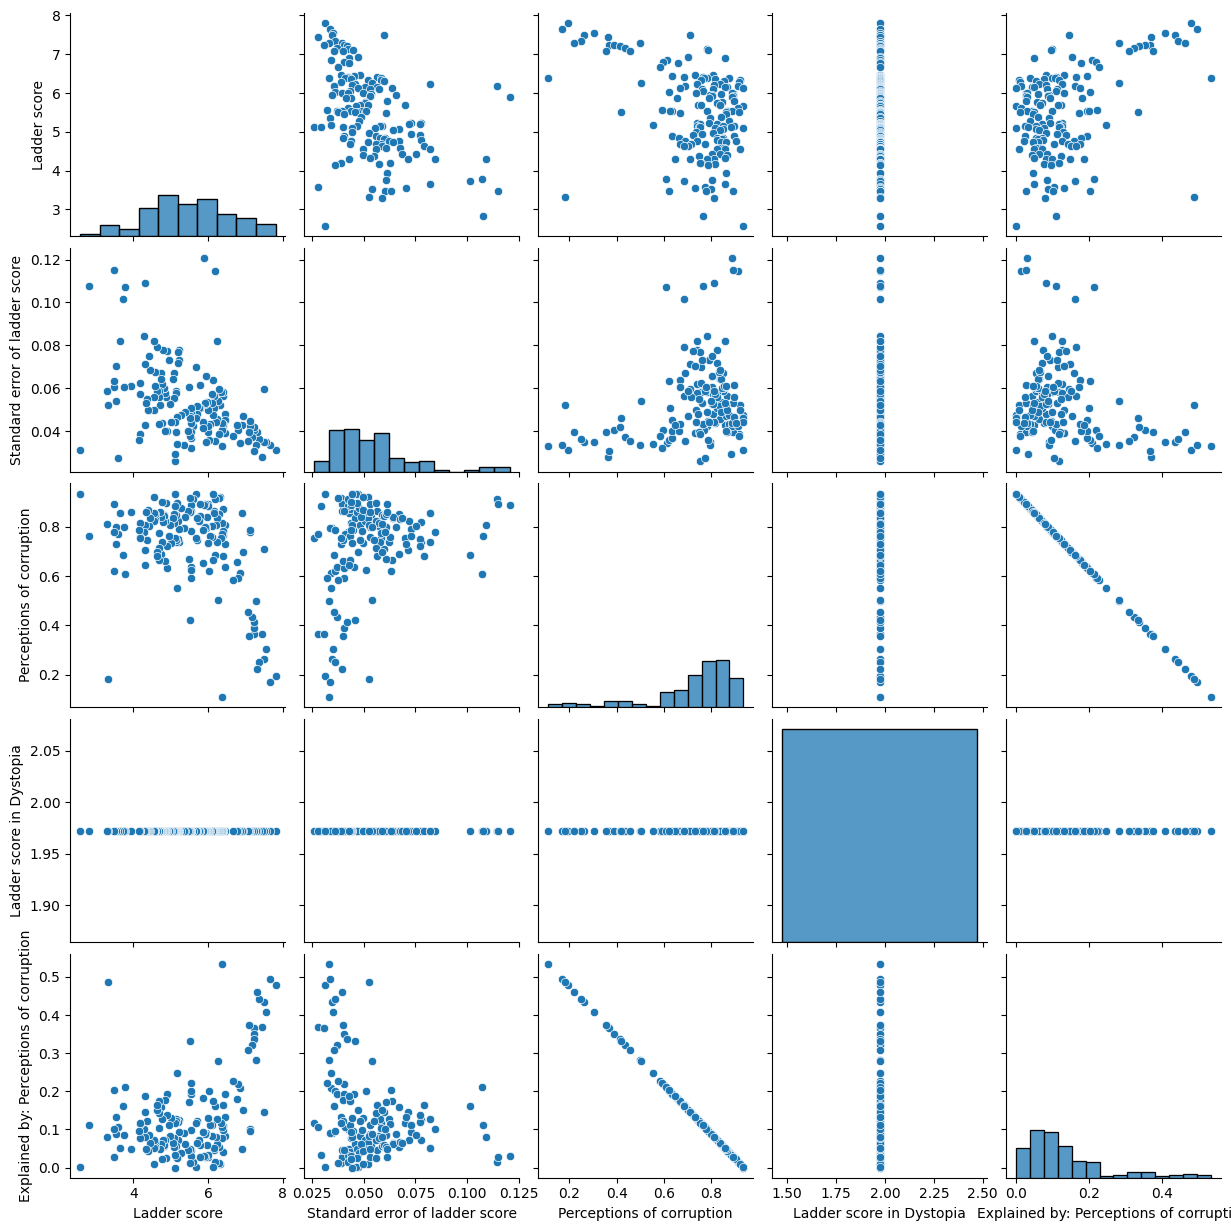

In [70]:
sns.pairplot(data[feats]);

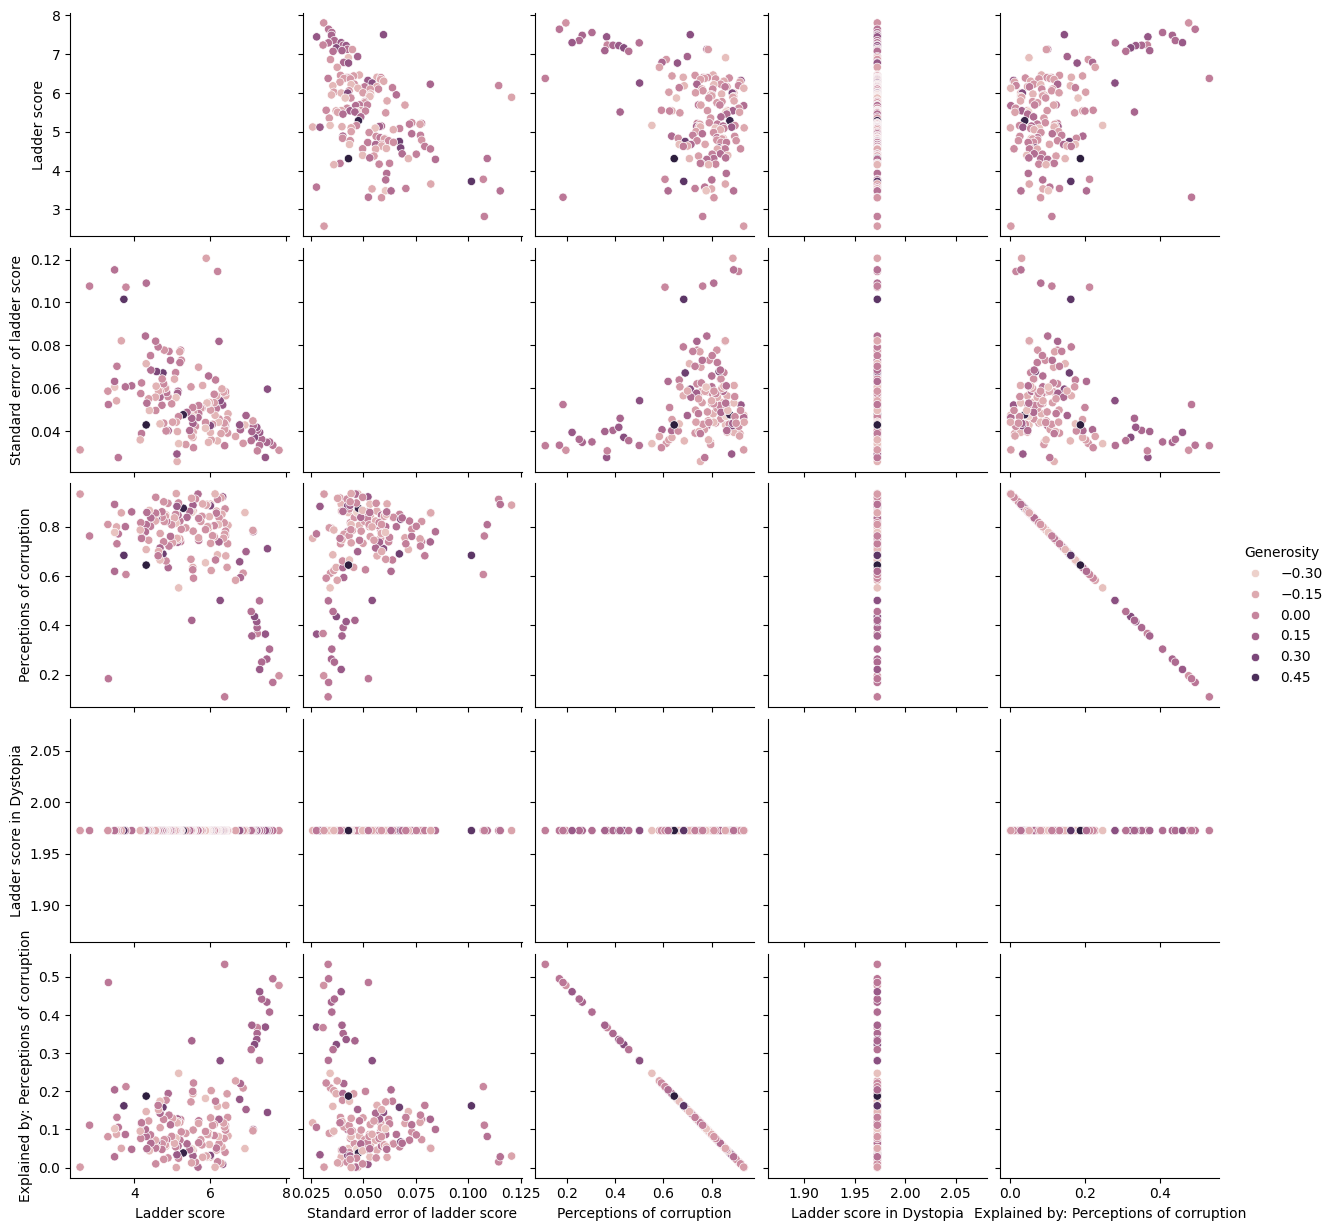

In [71]:
sns.pairplot(data[feats + ['Generosity']], hue='Generosity');

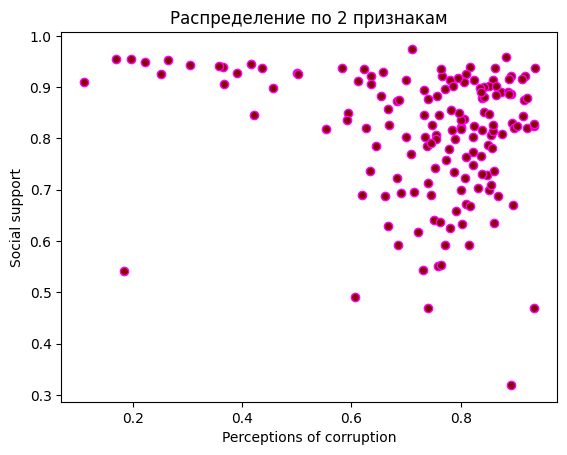

In [83]:
plt.scatter(data['Perceptions of corruption'],
            data['Social support'],
            color='darkred', edgecolors='magenta')
plt.xlabel('Perceptions of corruption')
plt.ylabel('Social support')
plt.title('Распределение по 2 признакам');

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

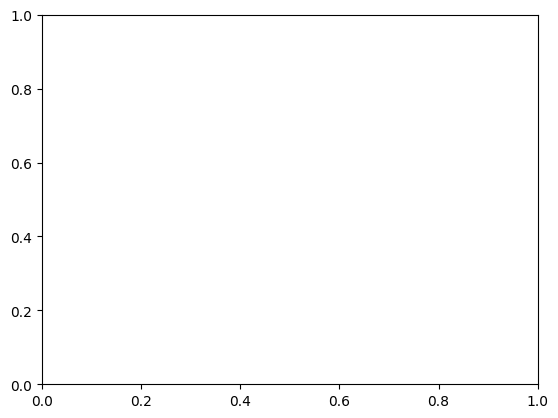

In [85]:
c = data['lowerwhisker'].map({False: 'magenta', True: 'darkgreen'})
edge_c = data['lowerwhisker'].map({False: 'darkred', True: 'green'})
# Настройка графика
plt.scatter(data['Social support'], data['Perceptions of corruption'], # булиевых значений нет
            color=c, edgecolors=edge_c
           )
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление');

In [87]:
data.corr(numeric_only=True)

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Ladder score,1.000000,-0.446443,0.999577,0.999601,0.775374,0.765001,0.770316,0.590597,0.069043,-0.418305,NaN,0.775374,0.765001,0.770316,0.590597,0.069043,0.418305,0.480279
Standard error of ladder score,-0.446443,1.000000,-0.420238,-0.471548,-0.578926,-0.515881,-0.586470,-0.292498,0.072742,0.303600,NaN,-0.578926,-0.515881,-0.586470,-0.292498,0.072742,-0.303600,0.149683
upperwhisker,0.999577,-0.420238,1.000000,0.998357,0.767483,0.759012,0.762109,0.589410,0.072379,-0.414331,NaN,0.767483,0.759012,0.762109,0.589410,0.072379,0.414331,0.491907
lowerwhisker,0.999601,-0.471548,0.998357,1.000000,0.782415,0.770201,0.777668,0.591271,0.065745,-0.421828,NaN,0.782415,0.770201,0.777668,0.591271,0.065745,0.421828,0.468590
Logged GDP per capita,0.775374,-0.578926,0.767483,0.782415,1.000000,0.781814,0.848469,0.419019,-0.118399,-0.334729,NaN,1.000000,0.781814,0.848469,0.419019,-0.118399,0.334729,-0.062063
Social support,0.765001,-0.515881,0.759012,0.770201,0.781814,1.000000,0.742744,0.478863,-0.056780,-0.210530,NaN,0.781814,1.000000,0.742744,0.478863,-0.056780,0.210530,-0.002801
Healthy life expectancy,0.770316,-0.586470,0.762109,0.777668,0.848469,0.742744,1.000000,0.448846,-0.071852,-0.353841,NaN,0.848469,0.742744,1.000000,0.448846,-0.071852,0.353841,-0.039948
Freedom to make life choices,0.590597,-0.292498,0.589410,0.591271,0.419019,0.478863,0.448846,1.000000,0.253721,-0.420145,NaN,0.419019,0.478863,0.448846,1.000000,0.253721,0.420145,0.062571
Generosity,0.069043,0.072742,0.072379,0.065745,-0.118399,-0.056780,-0.071852,0.253721,1.000000,-0.278480,NaN,-0.118399,-0.056780,-0.071852,0.253721,1.000000,0.278480,-0.021785
Perceptions of corruption,-0.418305,0.303600,-0.414331,-0.421828,-0.334729,-0.210530,-0.353841,-0.420145,-0.278480,1.000000,NaN,-0.334729,-0.210530,-0.353841,-0.420145,-0.278480,-1.000000,0.017851


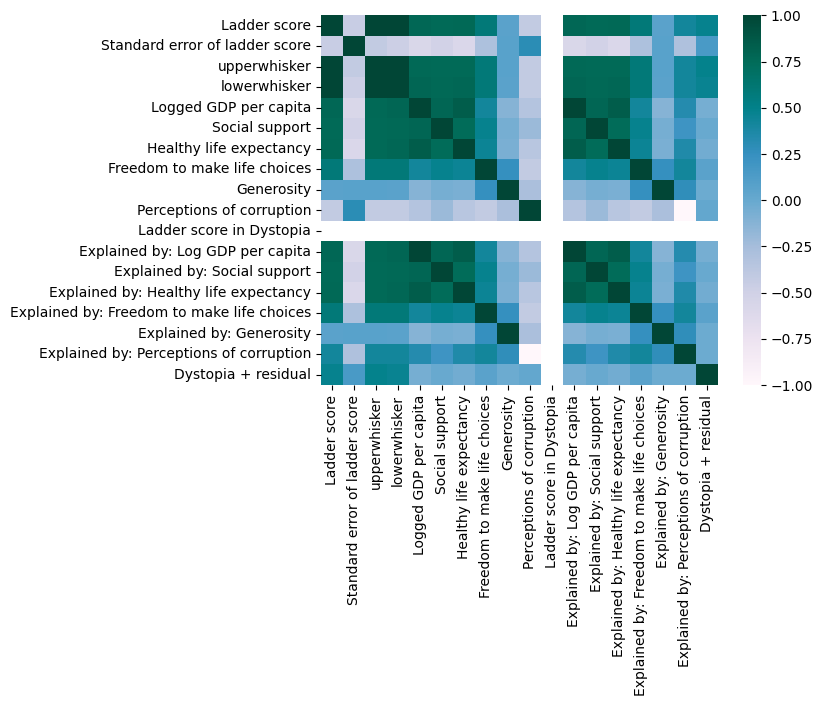

In [88]:
sns.heatmap(data.corr(numeric_only=True), cmap=plt.cm.PuBuGn);

In [89]:
data_uncorr = data.drop(feats, axis=1)
data_uncorr.columns

Index(['Country name', 'Regional indicator', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Dystopia + residual'],
      dtype='object')

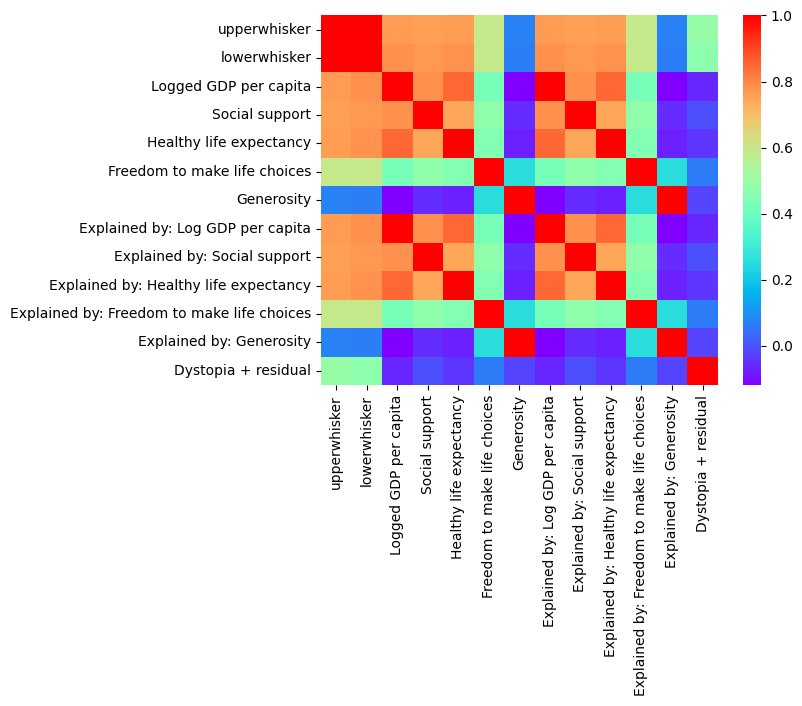

In [90]:
sns.heatmap(data_uncorr.corr(numeric_only=True), cmap=plt.cm.rainbow);